In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta =sm.datasets.fair.load_pandas().data


In [2]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + \
religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)


In [4]:
X.shape

(6366, 17)

In [5]:
y=pd.Series(y)


In [6]:
y.shape

(6366,)

In [7]:
#prepare dataframe for X and y values
df=pd.concat([X,y],axis=1)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,0
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [8]:
df.rename(columns={0: "Affairs"}, inplace=True)

In [9]:
df

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,Affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0.0


## Checking for null values

In [10]:
#So  we have 6366 data rows, 17 features and 1 label column
#Checking for null values is any 
df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
Affairs          0
dtype: int64

<AxesSubplot:>

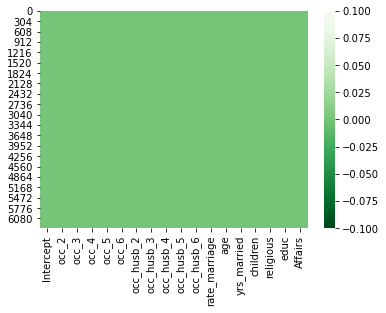

In [11]:
#Crosscheck with heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cmap="Greens_r")

So from above it is clear that our dataset has no null values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_2          6366 non-null   float64
 2   occ_3          6366 non-null   float64
 3   occ_4          6366 non-null   float64
 4   occ_5          6366 non-null   float64
 5   occ_6          6366 non-null   float64
 6   occ_husb_2     6366 non-null   float64
 7   occ_husb_3     6366 non-null   float64
 8   occ_husb_4     6366 non-null   float64
 9   occ_husb_5     6366 non-null   float64
 10  occ_husb_6     6366 non-null   float64
 11  rate_marriage  6366 non-null   float64
 12  age            6366 non-null   float64
 13  yrs_married    6366 non-null   float64
 14  children       6366 non-null   float64
 15  religious      6366 non-null   float64
 16  educ           6366 non-null   float64
 17  Affairs        6366 non-null   float64
dtypes: float

Dataframe has no categorical values to handle

## Checking if dataset is unbalanced

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


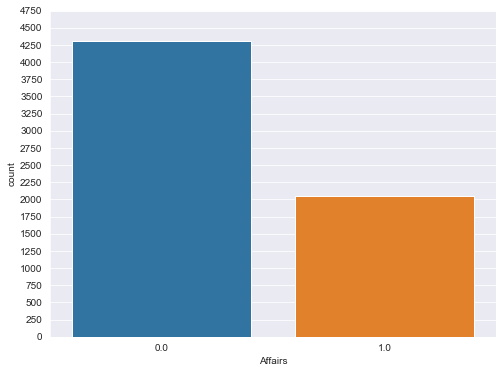

In [13]:
#checking if dataset is balanced
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(df["Affairs"])
plt.yticks(range(0,5000,250))
plt.show()

In [14]:
print(sum(df["Affairs"]==1))
print(sum(df["Affairs"]==0))

2053
4313


Dataset is unbalanced, number of Affairs = 1 is half of Affairs = 0. So data balancing is necessary.

In [15]:
import imblearn
rdm=imblearn.over_sampling.RandomOverSampler()
X,y=rdm.fit_sample(X,y)
df=pd.concat([X,y],axis=1)  #updating the balanced form of dataset

In [16]:
df

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,0
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,1.0
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,1.0,2.0,12.0,1.0
8623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,2.5,1.0,3.0,16.0,1.0
8624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,22.0,2.5,1.0,3.0,14.0,1.0


In [17]:
df.rename(columns={0: "Affairs"}, inplace=True)
df

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,Affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,1.0
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,1.0,2.0,12.0,1.0
8623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,2.5,1.0,3.0,16.0,1.0
8624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,22.0,2.5,1.0,3.0,14.0,1.0


In [18]:
print(df[df["Affairs"]==0].shape)
print(df[df["Affairs"]==1].shape)

(4313, 18)
(4313, 18)


C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


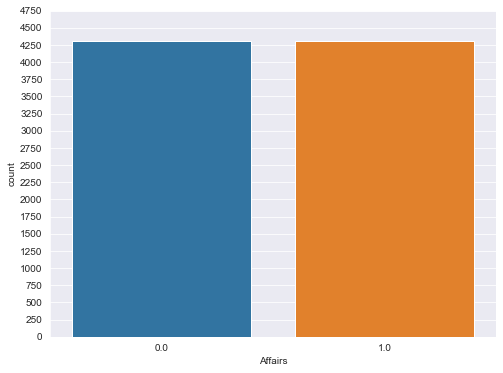

In [19]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(df["Affairs"])
plt.yticks(range(0,5000,250))
plt.show()

Now Dataset is balanced.

In [20]:
from scipy.stats import skew

for feature in  df.columns.values:
    print(feature ," ", skew(df[feature]))

Intercept   0.0
occ_2   2.1486484260965373
occ_3   0.22491926319918143
occ_4   1.020322490387475
occ_5   2.257013632379362
occ_6   7.332662355497552
occ_husb_2   1.4477376373787818
occ_husb_3   3.064919645392382
occ_husb_4   0.7931711472033273
occ_husb_5   0.9750215220980596
occ_husb_6   3.0479710637826765
rate_marriage   -0.8710372447506545
age   0.5131035036338677
yrs_married   0.6128208674581674
children   0.8313542788411655
religious   0.006341480456762928
educ   0.8229156439249199
Affairs   0.0


No much skewness problem is observed. So normalization of dataset wont be requried.

<AxesSubplot:>

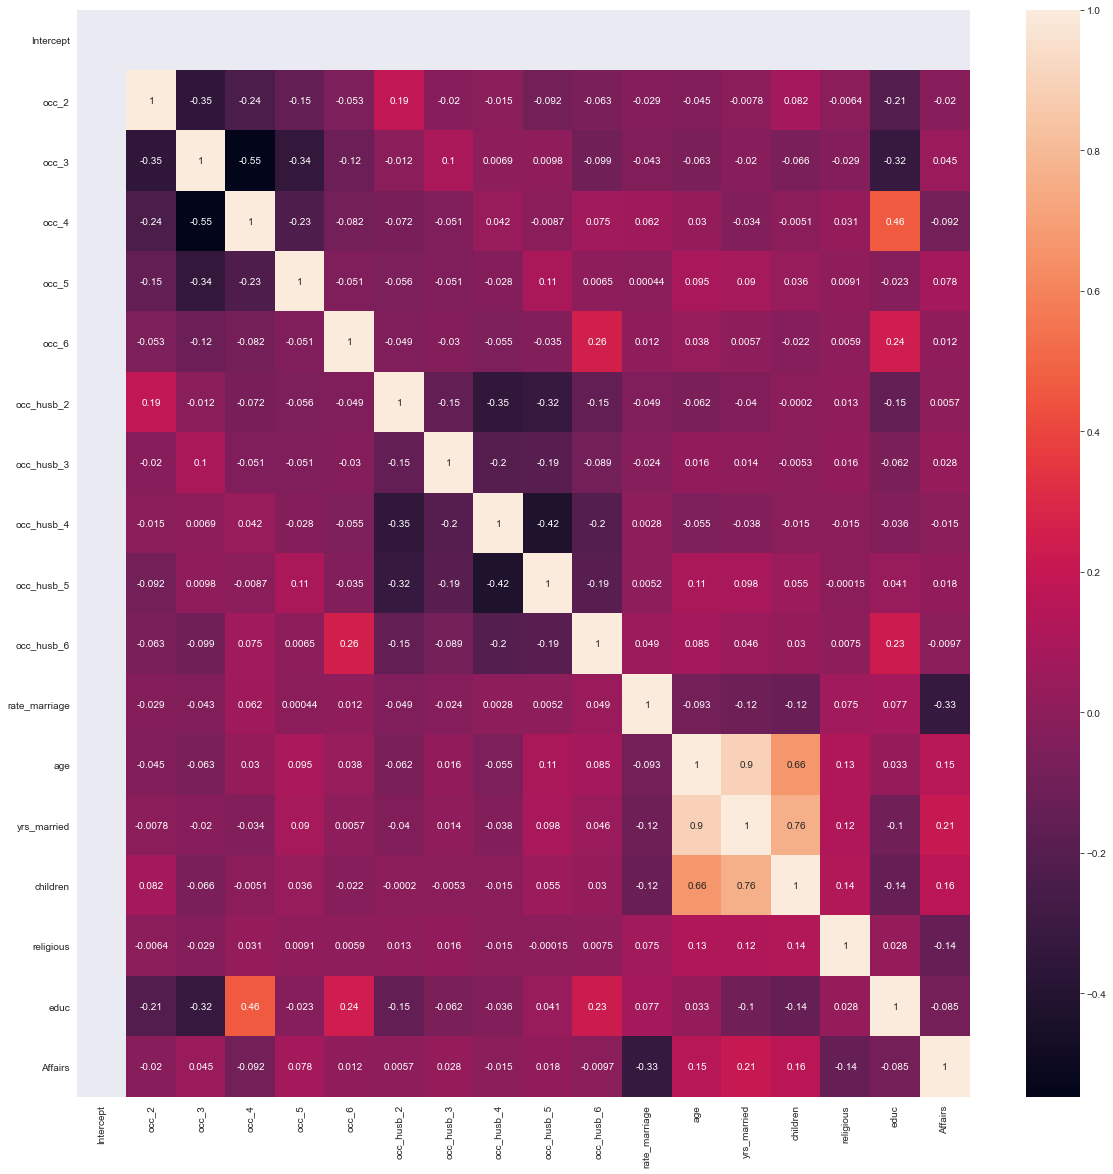

In [21]:
#Checking the Correlation matrixs
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

NO independent variable is highly correlated with dependent variable Affairs. But Age-Children, age-yrs_married, children-yrs_married are correlated.

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


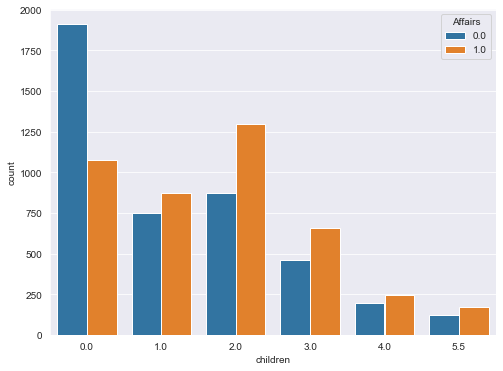

In [22]:
#NO independant varaible in highly correalted with Affiars. 
#But Age-Children, age-yrs_married, children-yrs_married are correlated.
#Will check its relation with dependant variable Affairs, to check if any independant variable can be removed.
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="Affairs")
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


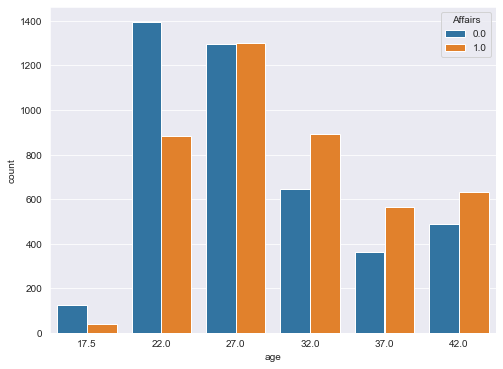

In [23]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("age",data=df,hue="Affairs")
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


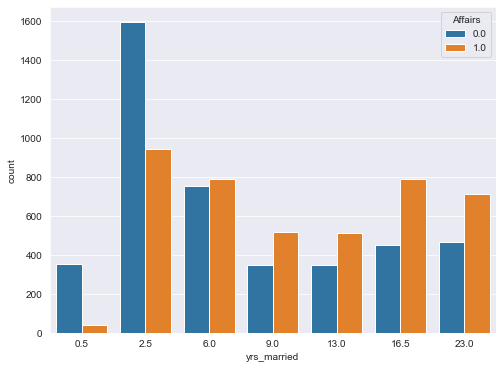

In [24]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("yrs_married",data=df,hue="Affairs")
plt.show()

Age and yrs_married almost gives same correlation with dependant variable affair. But age keeps dataset more balanced in comaparison to yrs_married. So we can move forward with dropping yrs_married.

In [25]:
'''df.drop(["yrs_married"],axis=1, inplace =True)
df.head()'''

'df.drop(["yrs_married"],axis=1, inplace =True)\ndf.head()'

In [26]:
X=df.drop(["Affairs"],axis=1)
y=df["Affairs"]
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,1.0,2.0,12.0
8623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,27.0,2.5,1.0,3.0,16.0
8624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,22.0,2.5,1.0,3.0,14.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 100, test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
prediction = model.predict(X_test)
prediction

array([0., 1., 1., ..., 0., 0., 1.])

In [31]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(f'Roc_Auc_Score : {roc_auc_score(y_test,prediction)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,prediction)}')

Accuracy Score : 0.6796060254924682
Roc_Auc_Score : 0.680341001498686
Confusion Matrix : [[587 248]
 [305 586]]


In [32]:
df.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ', 'Affairs'],
      dtype='object')

In [33]:
df_educ = (df['educ']-df['educ'].min())/(df['educ'].max()-df['educ'].min())
df_educ

0       0.727273
1       0.454545
2       0.636364
3       0.636364
4       0.454545
          ...   
8621    0.454545
8622    0.272727
8623    0.636364
8624    0.454545
8625    0.454545
Name: educ, Length: 8626, dtype: float64

In [34]:
df_age = (df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df_age

0       0.591837
1       0.387755
2       0.183673
3       0.795918
4       0.387755
          ...   
8621    0.591837
8622    0.387755
8623    0.387755
8624    0.183673
8625    0.795918
Name: age, Length: 8626, dtype: float64

In [35]:
df_yrs_married = (df['yrs_married']-df['yrs_married'].min())/(df['yrs_married'].max()-df['yrs_married'].min())
df_yrs_married 

0       0.377778
1       0.555556
2       0.088889
3       0.711111
4       0.377778
          ...   
8621    0.244444
8622    0.244444
8623    0.088889
8624    0.088889
8625    0.555556
Name: yrs_married, Length: 8626, dtype: float64

In [36]:
df_age

0       0.591837
1       0.387755
2       0.183673
3       0.795918
4       0.387755
          ...   
8621    0.591837
8622    0.387755
8623    0.387755
8624    0.183673
8625    0.795918
Name: age, Length: 8626, dtype: float64

In [37]:
X["scaled_age"]=df_age
X["scaled_educ"]=df_educ

In [38]:
X.drop(['age'],axis=1,inplace=True)
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,educ,scaled_age,scaled_educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,3.0,17.0,0.591837,0.727273
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,3.0,1.0,14.0,0.387755,0.454545
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,0.0,1.0,16.0,0.183673,0.636364
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,4.0,3.0,16.0,0.795918,0.636364
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,1.0,14.0,0.387755,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0,1.0,3.0,14.0,0.591837,0.454545
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,1.0,2.0,12.0,0.387755,0.272727
8623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,1.0,3.0,16.0,0.387755,0.636364
8624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.5,1.0,3.0,14.0,0.183673,0.454545


In [39]:
X.drop(['educ'],axis=1,inplace=True)
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,scaled_age,scaled_educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,3.0,0.591837,0.727273
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,3.0,1.0,0.387755,0.454545
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,0.0,1.0,0.183673,0.636364
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,4.0,3.0,0.795918,0.636364
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,1.0,0.387755,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0,1.0,3.0,0.591837,0.454545
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,1.0,2.0,0.387755,0.272727
8623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,1.0,3.0,0.387755,0.636364
8624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.5,1.0,3.0,0.183673,0.454545


In [40]:
X['scaled_yrs_married ']=df_yrs_married 

In [41]:
X.drop(['yrs_married'],axis=1,inplace=True)
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,children,religious,scaled_age,scaled_educ,scaled_yrs_married
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,0.591837,0.727273,0.377778
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,1.0,0.387755,0.454545,0.555556
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.183673,0.636364,0.088889
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,3.0,0.795918,0.636364,0.711111
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,0.387755,0.454545,0.377778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,0.591837,0.454545,0.244444
8622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,0.387755,0.272727,0.244444
8623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,3.0,0.387755,0.636364,0.088889
8624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,0.183673,0.454545,0.088889


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 100, test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [44]:
model.fit(X_train,y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
prediction = model.predict(X_test)
prediction

array([0., 1., 1., ..., 0., 0., 1.])

In [46]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(f'Roc_Auc_Score : {roc_auc_score(y_test,prediction)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,prediction)}')

Accuracy Score : 0.6784472769409038
Roc_Auc_Score : 0.6791810318756426
Confusion Matrix : [[586 249]
 [306 585]]


In [61]:
penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
'''class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]'''
solver = ['liblinear', 'saga'] 
param_grid = dict(penalty=penalty, 
C= C, 
solver=solver) 
logistic = LogisticRegression() 
grid = GridSearchCV(estimator=logistic, 
param_grid=param_grid, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 
grid_result = grid.fit(X_train, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Score:  0.7422913455741692
Best Params:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [62]:
log_model=LogisticRegression(C=1, penalty= 'l1', solver= 'saga') 
log_model_result=log_model.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [66]:
import pickle
with open('model/model.pkl','wb') as file:
    pickle.dump(log_model, file)

In [67]:
# saving the columns
model_columns = list(X_train.columns)
with open('model/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)